 # Group Project: Student Performance. 
### Members: Wen Jiang, Adam Gierej 

## Introduction

Student attendance and its relationship with grades is one of the most commonly discussed topics in education, with efforts to increase student retention being at the forefront of schools across the world. For example, a briefing by the U.S Department of Education from 2016 stated that the national rate of chronically absent students was 16%, which is over 7 million students. Studies conducted by the National Center for Education Statistics suggest that an inverse relationship between student absenteeism and grades occurs, as students missing more school are likely to miss important content, but how strong is this relationship? In this report, the relationship between student absence and the mean of student grades in the subject of mathematics will be examined using data gathered from a Portugese secondary school. The variables which will be utilized in this report when considering the students' grades are ‘G1’, ‘G2’ and ‘G3’. These variables describe the students' grades at each semester of the school year, with G1 being the first semester, G2 being the second and G3 being the third. Rather than examine the relationship between student absence and grades at each of the different semesters, the mean of the grades, ‘GTotal’, will be compared instead. The decision to use the mean of the students grades rather than comparing one semester of grades against absences was chosen because it would allow for a more balanced comparison, as if one semester was disproportionately affected by student absence then an incorrect or less accurate conclusion may be reached. The minimum GTotal, and therefore the minimum mark a student achieved was six, while the highest was 58, and the average grade was 32. The variable which described student absences is ‘absences,’ which ranged throughout the school year from a minimum of 0 to a maximum of 75. However, while the mean number of absences was 6, the median was 4, indicating that there are a larger number of students with few absences and a small group of students with a very large amount of absences which is shifting the average. 



## Method

The first step in our method was to load the various libraries which would be utilized to transform and analyze the data.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
install.packages("gridExtra")
library("gridExtra")   

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

With the libraries loaded, we then retrieved the raw data from a GitHub webpage, setting the seperation parameters to ";" as the raw data was seperated by semicolons, as is typical of European datasets. 

In [52]:
school_data <- read.table("https://raw.githubusercontent.com/adamg20/raw-data/main/school%20data", sep = ";", header = TRUE)
school_data

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,21,R,GT3,T,1,1,other,other,⋯,5,5,3,3,3,3,3,10,8,7
MS,M,18,R,LE3,T,3,2,services,other,⋯,4,4,1,3,4,5,0,11,12,10
MS,M,19,U,LE3,T,1,1,other,at_home,⋯,3,2,3,3,3,5,5,8,9,9


As the student grades are currently split into three different periods, they were first combined into a single variable by adding G1, G2 and G3 up to create GTotal. The data was then split into the training and testing sets with the split being 75% training and 25% testing. 

In [53]:
school_data2 <- school_data %>%
    mutate(GTotal = G1 + G2 + G3)
school_data2

set.seed(1)
school_split <- initial_split(school_data2, prop = 0.75, strata = GTotal)
school_train <- training(school_split)
school_test <- testing(school_split)
school_train
school_test

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GTotal
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,3,4,1,1,3,6,5,6,6,17
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,3,3,1,1,3,4,5,5,6,16
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,3,2,2,3,3,10,7,8,10,25
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,21,R,GT3,T,1,1,other,other,⋯,5,3,3,3,3,3,10,8,7,25
MS,M,18,R,LE3,T,3,2,services,other,⋯,4,1,3,4,5,0,11,12,10,33
MS,M,19,U,LE3,T,1,1,other,at_home,⋯,2,3,3,3,5,5,8,9,9,26


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GTotal
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,3,3,1,1,3,4,5,5,6,16
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,3,2,2,3,3,10,7,8,10,25
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,3,2,1,2,5,4,6,10,10,26
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
392,MS,M,17,U,LE3,T,3,1,services,services,⋯,4,5,3,4,2,3,14,16,16,46
393,MS,M,21,R,GT3,T,1,1,other,other,⋯,5,3,3,3,3,3,10,8,7,25
394,MS,M,18,R,LE3,T,3,2,services,other,⋯,4,1,3,4,5,0,11,12,10,33


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GTotal
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,3,4,1,1,3,6,5,6,6,17
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,2,2,1,1,5,2,15,14,15,44
11,GP,F,15,U,GT3,T,4,4,teacher,health,⋯,3,3,1,2,2,0,10,8,9,27
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
387,MS,F,18,R,GT3,T,4,4,teacher,at_home,⋯,4,3,2,2,5,7,6,5,6,17
388,MS,F,19,R,GT3,T,2,3,services,other,⋯,4,2,1,2,5,0,7,5,0,12
395,MS,M,19,U,LE3,T,1,1,other,at_home,⋯,2,3,3,3,5,5,8,9,9,26


Now that the data it split into the testing and training sets, to get an understanding of what the distribution of absences vs total grades are in the training set, a graph was made with total grades being on the x-axis and absences being on the y-axis.

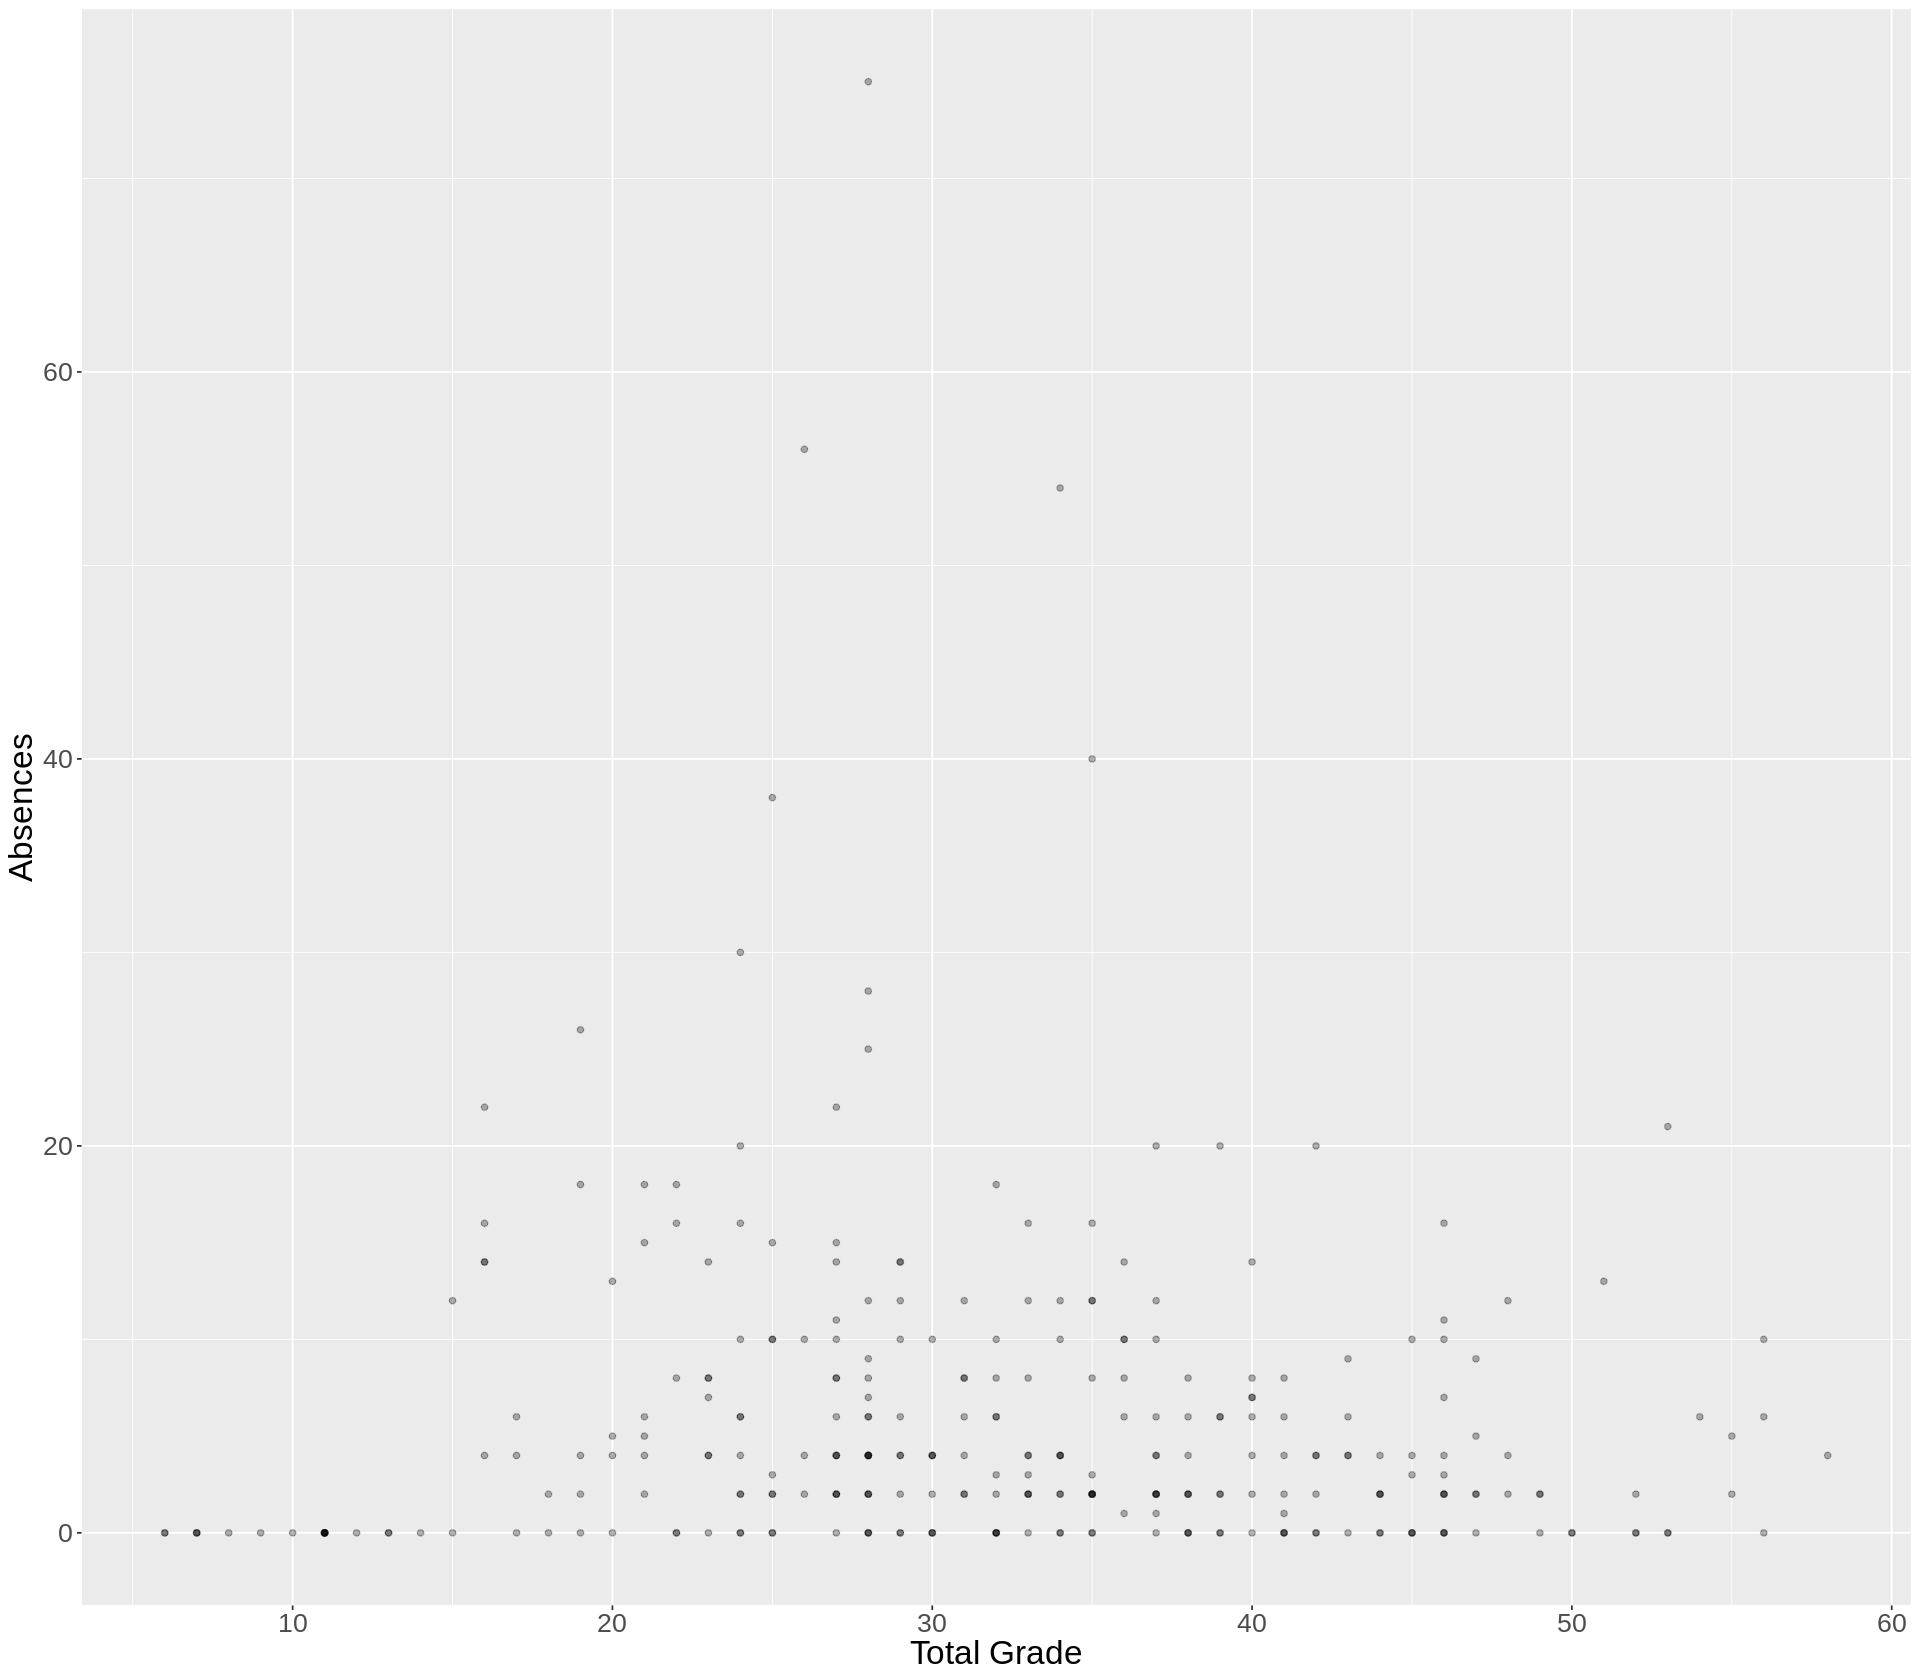

In [54]:
school_plot <- ggplot(school_train, aes(x = GTotal, y = absences)) +
    geom_point(alpha = 0.3) +
    xlab("Total Grade") +
    ylab("Absences") +
    theme(text = element_text(size = 20))
school_plot



In order to find the relationship between absence and student grade, a regression model will be created. A regression model was chosen because it allows for the specific prediction of a students grades based on their number of absences, unlike classification models which would only be able to predict categories which students may fall under. The first step to create a regression model would be to standardize the training data to have a mean of 1 and a standard deviation of 0. Standardization is important to increase the accuracy of our model because without it, some results (such as a high number of absences) would have a greater effect on the predictor than a small number of absences despite not being more important. 

In [55]:
school_recipe <- recipe(GTotal ~ absences, data = school_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors()) 
school_recipe


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

Operations:

Scaling for all_predictors()
Centering for all_predictors()

The next step in our method was to figure out what is the ideal number of k-nearest neighbors to get the most accurate results possible for our model. To do this, we build a specification with the tune() function to first figure out what that ideal k value is, before we can then use it with our recipe to create a model which can then be compared alongside the testing data.

In [56]:
knn_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
set_engine("kknn") %>%
set_mode("regression") 
knn_spec


K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We then performed cross-validation with ten folds. Cross validation of our training data set will further increase the accuracy at which the final model performs predictions by having an additional validation set to check the results of our training set against. 

In [57]:
set.seed(1)
school_vfold <- vfold_cv(school_train, v = 10, strata = GTotal) 



We then created a workflow with the standardized data found in the recipe. This links the specification with the recipe.

In [58]:
school_workflow = workflow() %>%
add_recipe(school_recipe) %>%
add_model(knn_spec)
school_workflow


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


After creating the workflow, the ideal k value can now be found. A tibble is created, describing the range of neighbor values to be tested. The minimum value of 1 and the maximum value of 228 was chosen because it represents the total number of rows in the school_train dataset, so that all possible k values can be tested (as k values cannot be greater than the number of rows or less than 1). The tibble was then put into the tune_grid function along with the resamples from the cross-validation to produce a table with the mean value of each possible neighbor value using the metrics of RSQ and RMSE. 

In [59]:
set.seed(1)
gridvals = tibble(neighbors = seq(1,228))
school_results <- school_workflow %>%
tune_grid(resamples = school_vfold, grid = gridvals) %>%
collect_metrics() 
school_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,16.56974354,10,0.78974955,Model001
1,rsq,standard,0.04012752,10,0.02037664,Model001
2,rmse,standard,14.16973982,10,0.72157449,Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
227,rsq,standard,0.04308006,10,0.01747832,Model227
228,rmse,standard,10.93403383,10,0.38847006,Model228
228,rsq,standard,0.04367091,10,0.01455824,Model228


As to measure the accuracy of a k-neighbor predictor we only use RMSE, we can filter for it specifically from the .metric column to get rid of the RSQ results. 

In [60]:
accuracies = school_results %>%
filter(.metric == "rmse")
accuracies



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,16.56974,10,0.7897495,Model001
2,rmse,standard,14.16974,10,0.7215745,Model002
3,rmse,standard,13.74756,10,0.6141363,Model003
⋮,⋮,⋮,⋮,⋮,⋮,⋮
226,rmse,standard,10.93614,10,0.3874105,Model226
227,rmse,standard,10.93203,10,0.3872934,Model227
228,rmse,standard,10.93403,10,0.3884701,Model228


Now that the only metric used in the table is RMSE, we use filter for the lowest mean RMSE value. The k value with the lowest RMSE is likely the most accurate because the larger the mean RMSE, the greater the difference between the predicted values and the actual values. 

In [61]:
school_min = accuracies %>%
filter(mean == min(mean)) 
school_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
54,rmse,standard,10.73493,10,0.3750752,Model054


We now find that the ideal k-nearest neighbor value is 54. In order to verify this, a graph of all of the k-nearest neighbor values from 1 and 228 was plotted with the mean RMSE on the y-axis and the k-nearest neighbors on the x-axis. In addition, a line was graphed at x = 54 to see if it could be visually determined that k = 54 was the lowest value. 

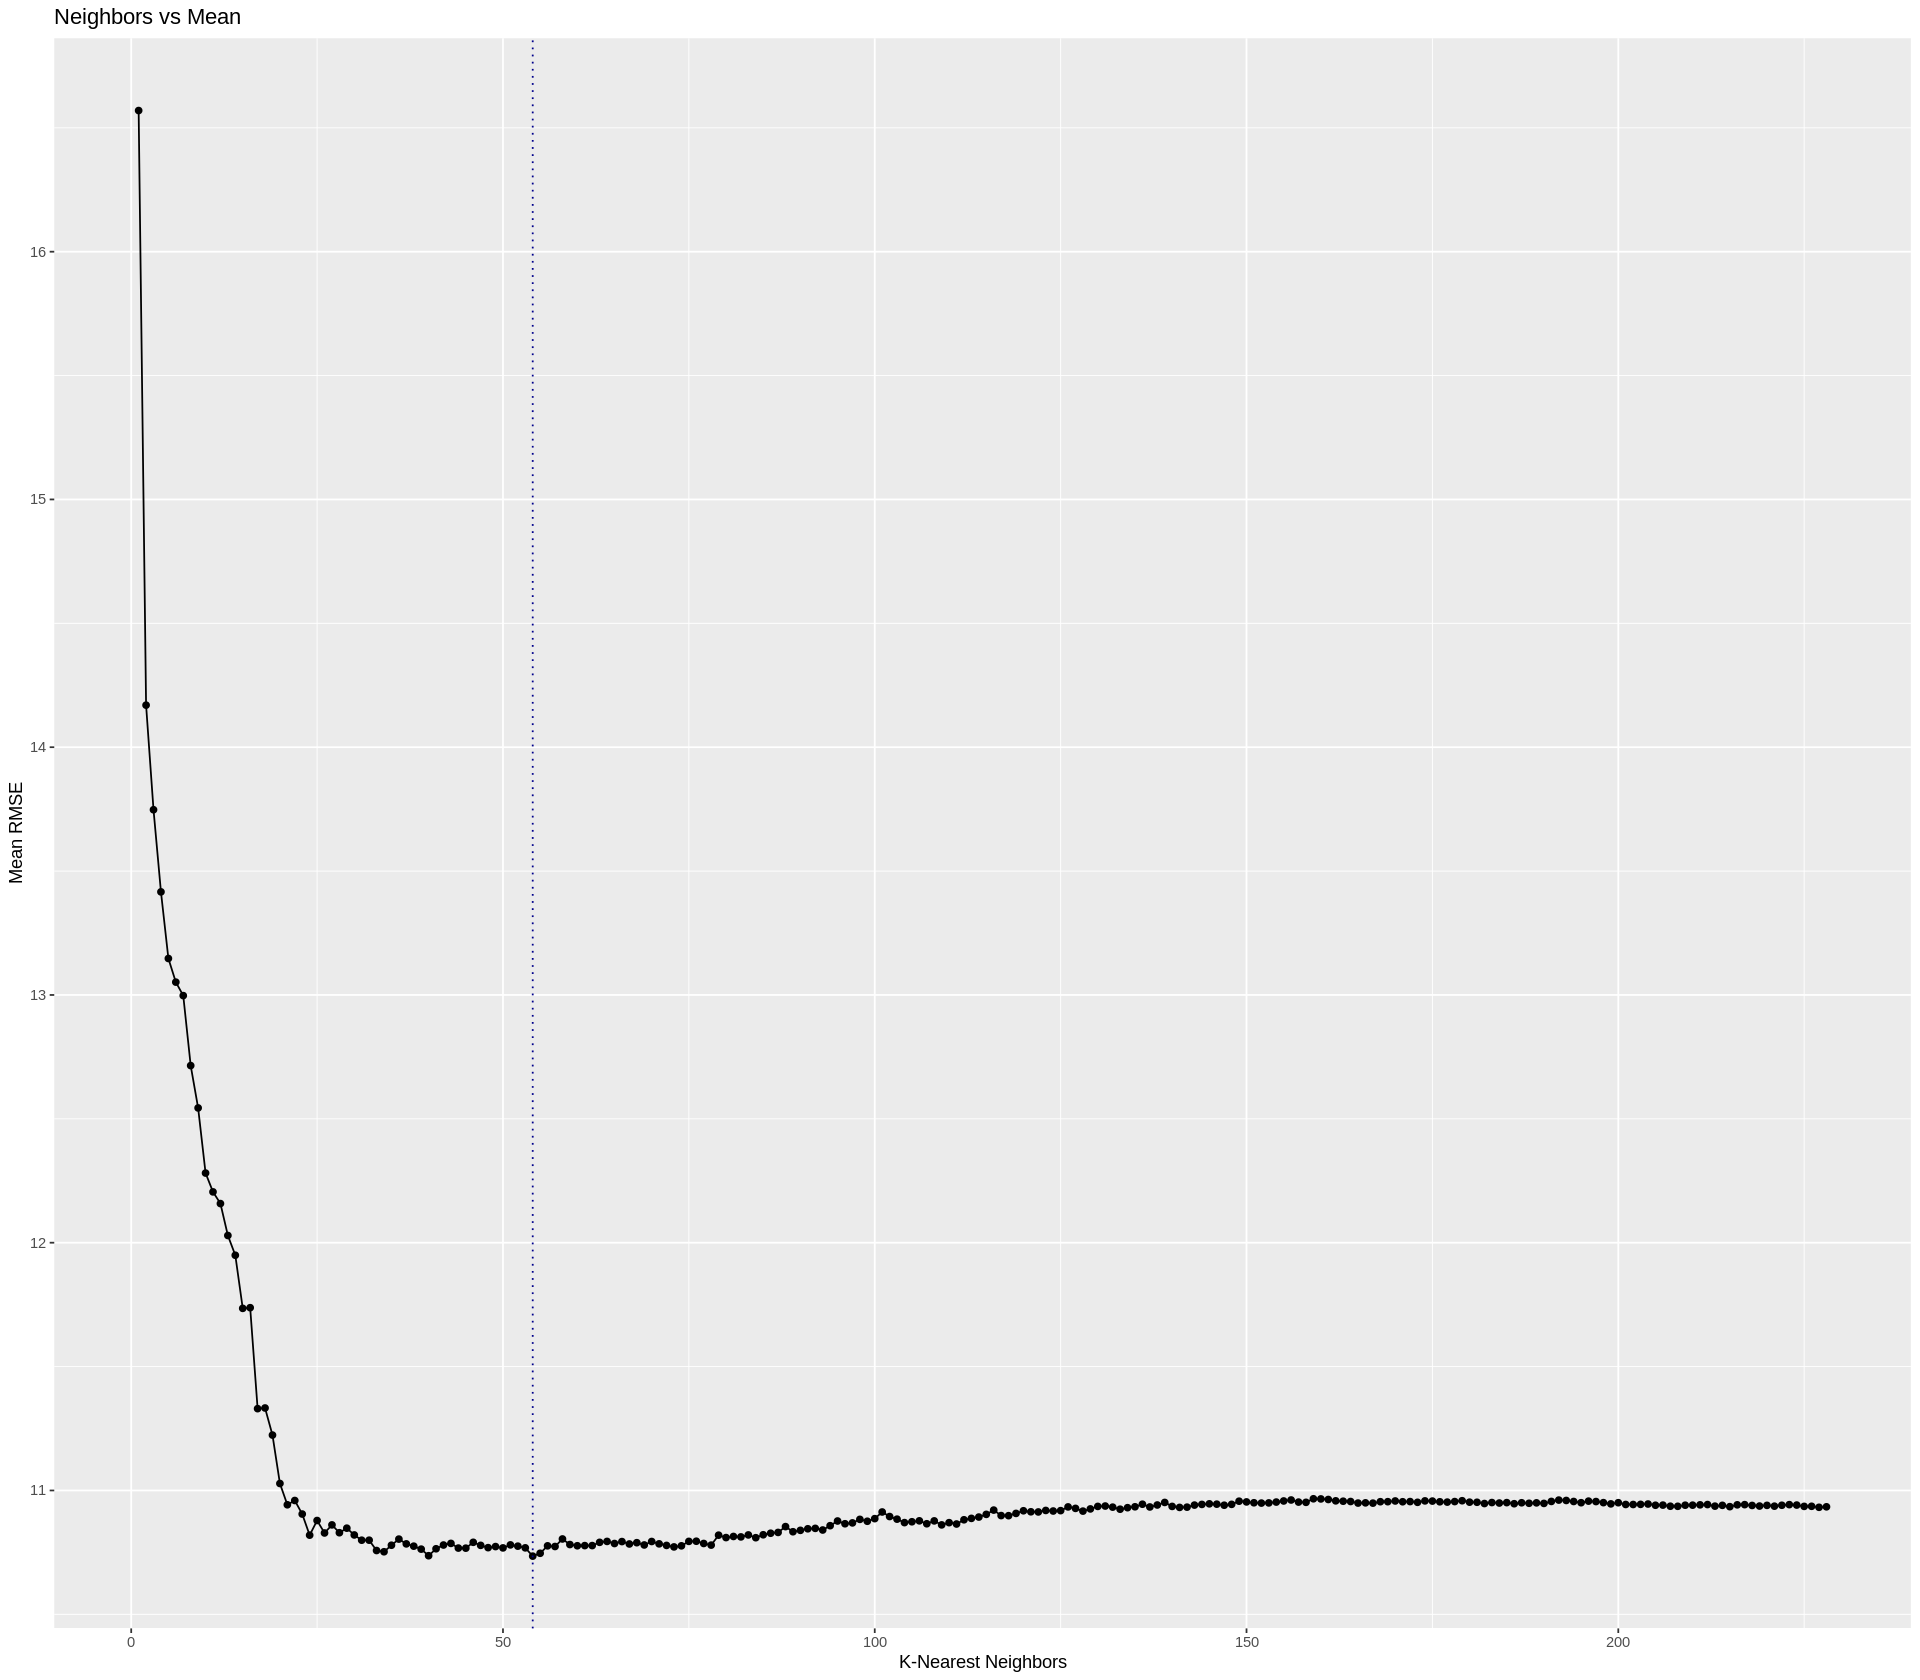

In [62]:
options(repr.plot.height = 14, repr.plot.width = 16)
accuracy_vs_k <- ggplot(accuracies, aes(x=neighbors, y = mean)) + 
geom_point(color = 'black') + 
geom_line(color = 'black') + 
geom_vline(xintercept = 54, linetype = "dotted", color = 'darkblue') + 
labs(x="K-Nearest Neighbors", y="Mean RMSE") + 
ggtitle("Neighbors vs Mean")
accuracy_vs_k

It can be seen that k = 54 appears to be the lowest mean RMSE value on the graph, and thus the answer produced by our model to determine the ideal k value is likely accurate. Now that the ideal k value was determined, it must be plugged back into a workflow with the original recipe after making a new specification for the model with neighbors as k = 54 rather than tune(). 

In [63]:
kmin <- school_min %>% pull(neighbors) 

school_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) %>%
set_engine("kknn") %>%
set_mode("regression") 

school_workflow2 <- workflow() %>%
add_recipe(school_recipe) %>%
add_model(school_spec) %>%
fit(data = school_train) 
school_workflow2

school_workflow3 <- workflow() %>%
add_recipe(school_recipe) %>%
add_model(school_spec) %>%
fit(data = school_test) 
school_workflow2


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~kmin,     kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 8.767214
Minimal mean squared error: 115.4542
Best kernel: rectangular
Best k: 54

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~kmin,     kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 8.767214
Minimal mean squared error: 115.4542
Best kernel: rectangular
Best k: 54

Now that the new workflow has been made using the ideal k value and the recipe, and we have verified that the k value produced by our model has the lowest mean RMSE, we can now compare the model against the testing data. BY doing so, we can find the accuracy of our model by trying to predict values found in the testing data set using our model with the predict() function. 

In [64]:
school_summary <- school_workflow2 %>%
predict(school_test) %>%
bind_cols(school_test) %>%
metrics(truth = GTotal, estimate = .pred)
school_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,11.17495847
rsq,standard,0.05253167
mae,standard,9.31347843


To ensure one more that the k-nearest neighbors value chosen was the best possible choice, the RMSE values of three different neighbors values were tested. If any of the randomly chosen k values result in a lower minimum RMSE value, than our prediction for the lowest k value is inaccurate.

In [65]:
school_spec_20 <- nearest_neighbor(weight_func = "rectangular", neighbors = 20) %>%
set_engine("kknn") %>%
set_mode("regression")

school_20 <- workflow() %>%
add_recipe(school_recipe) %>%
add_model(school_spec_20) %>%
fit(data = school_train) %>%
predict(school_test) %>%
bind_cols(school_test) %>%
metrics(truth = GTotal, estimate = .pred)
school_20


school_spec_60 <- nearest_neighbor(weight_func = "rectangular", neighbors = 60) %>%
set_engine("kknn") %>%
set_mode("regression")

school_60 <- workflow() %>%
add_recipe(school_recipe) %>%
add_model(school_spec_60) %>%
fit(data = school_train) %>%
predict(school_test) %>%
bind_cols(school_test) %>%
metrics(truth = GTotal, estimate = .pred)
school_60


school_spec_90 <- nearest_neighbor(weight_func = "rectangular", neighbors = 90) %>%
set_engine("kknn") %>%
set_mode("regression")

school_90 <- workflow() %>%
add_recipe(school_recipe) %>%
add_model(school_spec_90) %>%
fit(data = school_train) %>%
predict(school_test) %>%
bind_cols(school_test) %>%
metrics(truth = GTotal, estimate = .pred)
school_90

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,13.01389919
rsq,standard,0.05331349
mae,standard,10.29329897


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,11.21072373
rsq,standard,0.05008743
mae,standard,9.31374570


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,11.22762462
rsq,standard,0.06043823
mae,standard,9.26414662


The minimum RMSE values are the k values of 20, 60 and 90 were all higher than the minimum RMSE value with k = 54. Furthermore, the lowest minimum RMSE values of the above neighbor values was 60, further demonstrating that the ideal k value should be near 60, such as our k value of 54. In order to test the accuracy of our predictor using k = 54, three tibbles are created, each with a different value for absence, before using our model to predict the total grade given each absence value.

In [66]:
new_obs_1 <- tibble(absences = 2)
predict(school_workflow2, new_obs_1)

new_obs_1 <- tibble(absences = 0)
predict(school_workflow2, new_obs_1)

new_obs_2 <- tibble(absences = 15)
predict(school_workflow2, new_obs_2)

new_obs_3 <- tibble(absences = 47)
predict(school_workflow2, new_obs_3)


.pred
<dbl>
35.59259


.pred
<dbl>
28.96296


.pred
<dbl>
31.07407


.pred
<dbl>
30.18519


After obtaining our predictions, we can now plot our model on a graph against the original testing data, as well as on the original training data, to visually see a comparison of the predictions from our model and the real data. The graphs were put side by side to allow easy comparison and to see the similarities in how the model predicts across both data sets. 

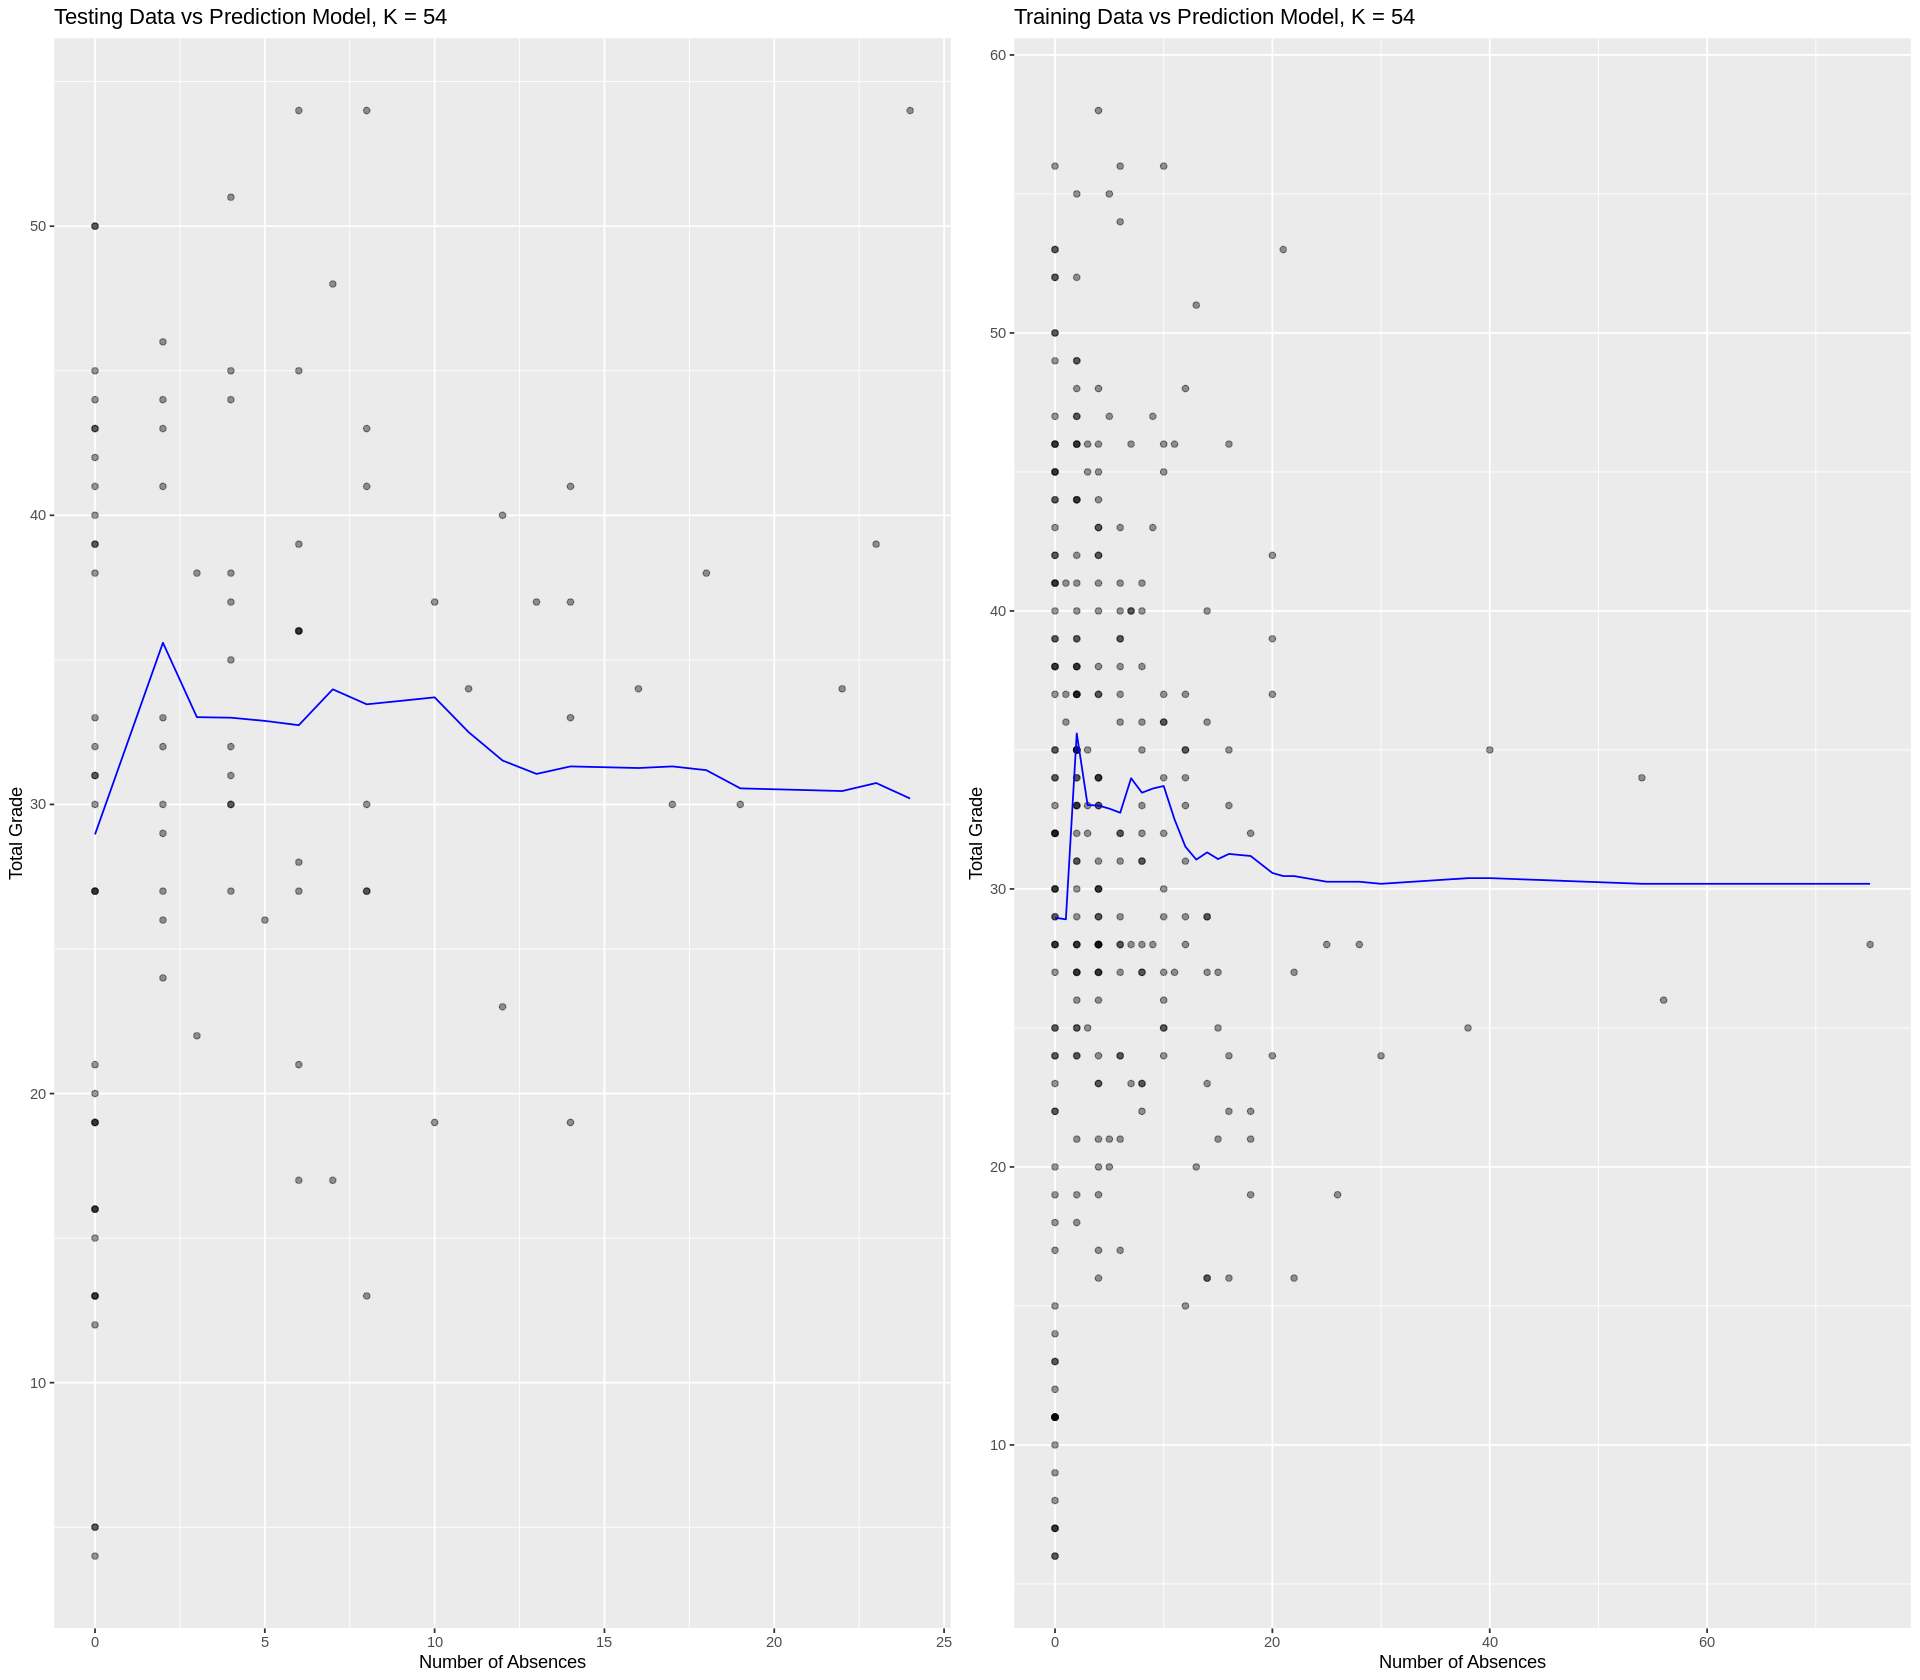

In [76]:
set.seed(1234)


school_preds_test <- school_workflow2 %>%
  predict(school_test) %>%
  bind_cols(school_test)

plot_final <- ggplot(school_preds_test, aes(x = absences, y = GTotal)) +
  geom_point(alpha = 0.4) +
  xlab("Number of Absences") +
  ylab("Total Grade") +
  geom_line(data = school_preds_test, aes(x = absences, y = .pred), color = "blue") +
  ggtitle("Testing Data vs Prediction Model, K = 54")


school_preds_train <- school_workflow2 %>%
  predict(school_train) %>%
  bind_cols(school_train)

plot_final_train <- ggplot(school_preds_train, aes(x = absences, y = GTotal)) +
  geom_point(alpha = 0.4) +
  xlab("Number of Absences") +
  ylab("Total Grade") +
  geom_line(data = school_preds_train, aes(x = absences, y = .pred), color = "blue") +
  ggtitle("Training Data vs Prediction Model, K = 54")
grid.arrange(plot_final, plot_final_train, ncol = 2) 

## Expected outcomes and significance
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

Through the transformations of the raw data as described above, a regressive model was created to find the total grades of students in a Portugese school using their number of absences as the predictor. By first standardizing and centering the data, performing cross-validation, and creating a workflow of the recipe along with the specification the ideal k-nearest neighbor value to predict total grades was found to be 54. The mean RMSE value of the model by using the ideal k-nearest neighbor value was found to be 10.72. While this value may seem large, in the context of the range of total grades being from 1 to 63, it does not invalidate the usefulness of the model as a predictor. When using the model to predict random total grades when given the students number of absences, the model found that students with 2 total absences had the highest total grades at a predicted 35.6, while students with a total of 0 absences had the lowest predicted total grades at 29. This is contrary to our intial expectations that students with a higher number of absences would have the lowest predicted grades. While we did anticipate that highest total grades would be achieved by students with a lower number of absences, such as 2, the finding that students with the lowest possible number of absences also had the lowest predicted grades was surprising. One hypothesis for why this may occur is that the model is too overfitting due to a lack of a larger pool of data, and therefore the fact that students with the least absences attaining the lowest predicted grades is the result of a random sample. However, the overall trend of the model, as see in the above graphs, demonstrates that students with a lower number of absences tended to receive a higher predicted grade. 